# Паттерны поведения в аномальных данных

In [2]:
from unittest import case

import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
anomaly_df = pd.read_csv('anomaly.csv')
normal_df = pd.read_csv('normal.csv')

In [4]:
anomaly_df.describe()

,transaction_id,ip,device_id,tran_code,mcc,client_id,pin_inc_count,card_status,sum,balance
count,8.900000e+01,8.900000e+01,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000
mean,5.761886e+06,2.126574e+09,814.775281,9.988764,5725.483146,5.360003e+08,2.775281,0.078652,672.018652,259517.520654
std,2.700458e+06,1.176434e+09,461.041010,67.378256,2581.352976,2.674706e+08,0.779755,0.270720,331.881184,311474.742989
min,1.090076e+06,9.627244e+07,32.000000,-1.000000,1002.000000,1.080062e+08,0.000000,0.000000,107.080000,0.000000
25%,3.366166e+06,7.717971e+08,364.000000,-1.000000,3335.000000,3.089441e+08,3.000000,0.000000,410.690000,0.000000
50%,5.753652e+06,2.147490e+09,860.000000,-1.000000,6001.000000,5.255364e+08,3.000000,0.000000,614.930000,123017.760900
75%,8.222932e+06,3.240034e+09,1231.000000,-1.000000,7785.000000,7.786368e+08,3.000000,0.000000,993.180000,526963.950000
max,9.973638e+06,3.647996e+09,1495.000000,451.000000,9996.000000,9.695475e+08,3.000000,1.000000,1196.120000,965845.370000


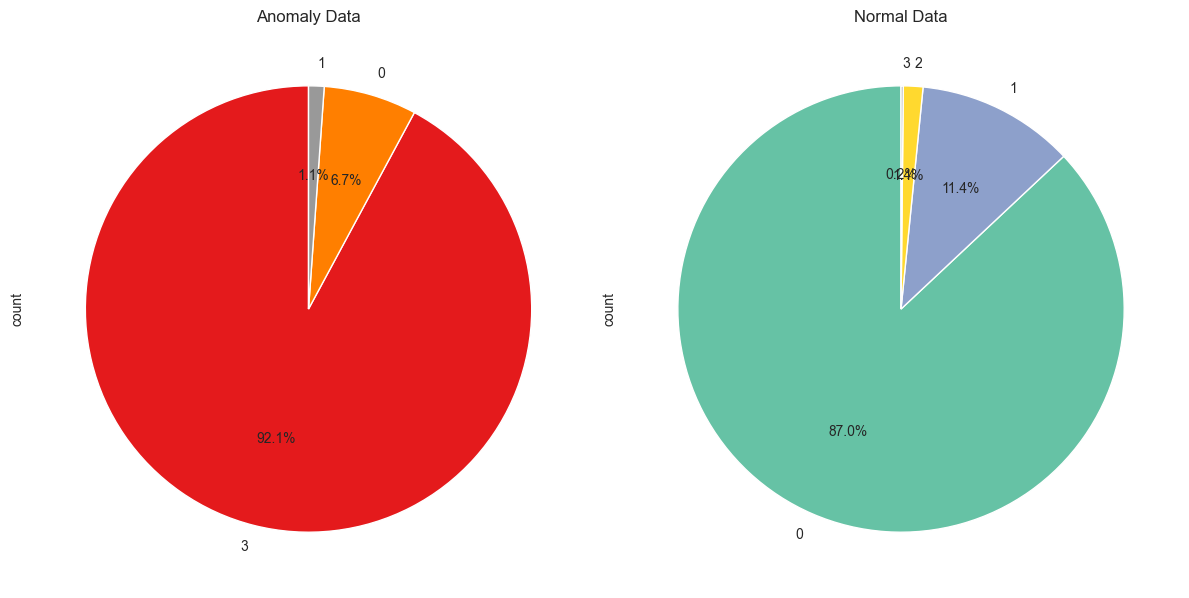

In [5]:
category_counts_anomaly = anomaly_df['pin_inc_count'].value_counts()
category_counts_normal = normal_df['pin_inc_count'].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
category_counts_anomaly.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set1', legend=False)
plt.title('Anomaly Data')
plt.subplot(1, 2, 2)
category_counts_normal.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title('Normal Data')
plt.tight_layout()
plt.show()

Видна большая разница между всеми данными и аномальными. Вот это явный паттерн повидения, слишком много попыток ввода пинкода

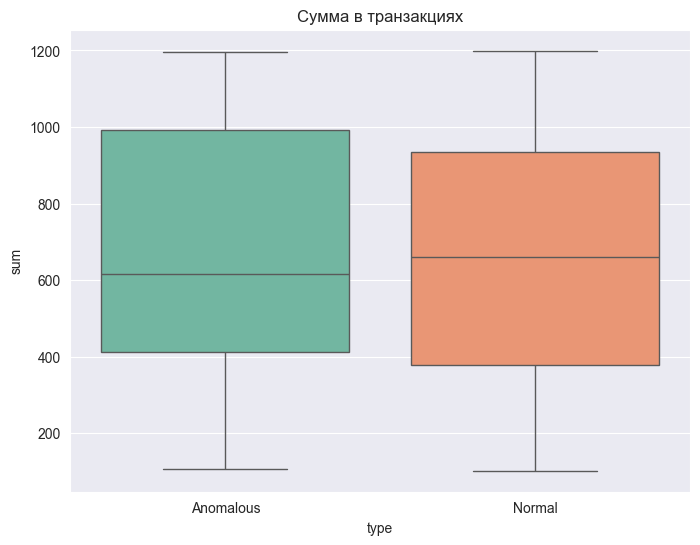

In [15]:

anomaly_df['type'] = 'Anomalous'
normal_df['type'] = 'Normal'

combined_df = pd.concat([anomaly_df[['sum', 'type']], normal_df[['sum', 'type']]])

plt.figure(figsize=(8, 6))
plt.title('Сумма в транзакциях')
sns.boxplot(data=combined_df, x='type', y='sum', orient='v', hue='type', palette="Set2", showfliers=False)

plt.show()

Практически индентично по сумме, что в аномальных данных, что в нормальных, она слегка большее 600

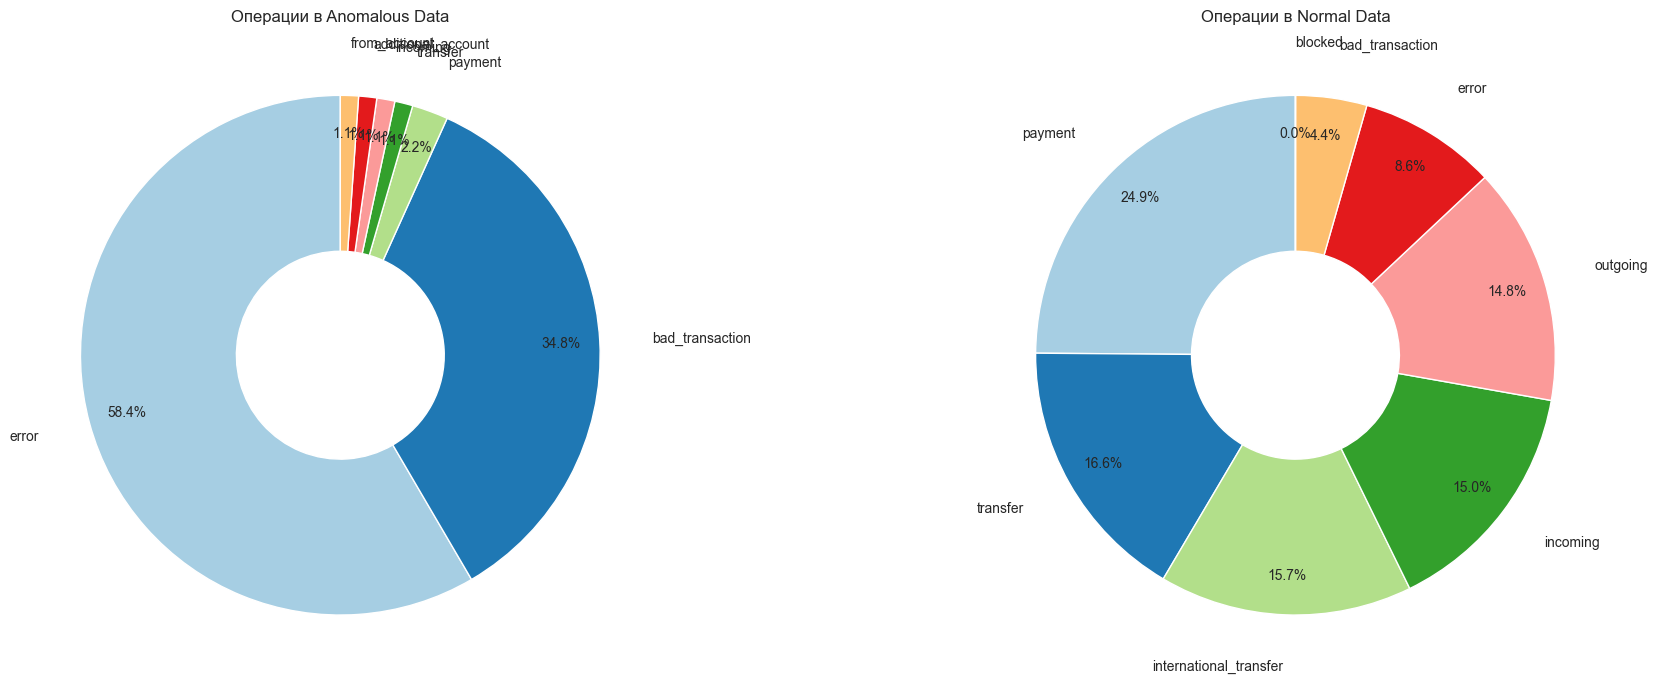

In [7]:
anomaly_counts = anomaly_df['oper_type'].value_counts()

normal_counts = normal_df['oper_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

axes[0].pie(anomaly_counts,
            labels=anomaly_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors,
            labeldistance=1.2,
            pctdistance=0.85,  
            wedgeprops={'width': 0.6})

axes[1].pie(normal_counts,
            labels=normal_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors,
            labeldistance=1.2, 
            pctdistance=0.85, 
            wedgeprops={'width': 0.6})
axes[1].set_title('Операции в Normal Data')
axes[0].set_title('Операции в Anomalous Data')

plt.tight_layout()
plt.show()

Опять явный признак аномальности данных. Или "error" или "bad_transaction", в полном наборе данных всё сбалансированно

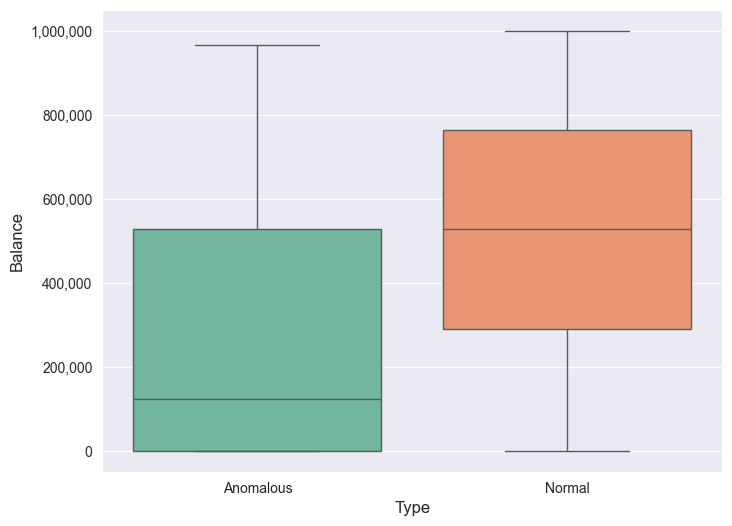

In [8]:
anomaly_df['type'] = 'Anomalous'
normal_df['type'] = 'Normal'
combined_df = pd.concat([anomaly_df[['balance', 'type']], normal_df[['balance', 'type']]])

plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='type', y='balance', orient='v', hue='type', palette="Set2", showfliers=False)

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Type', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Вот тут медиана баланса в аномальных данных выбивается, нельзя это считать уверенным паттерном, но с этим тожн можно работать  

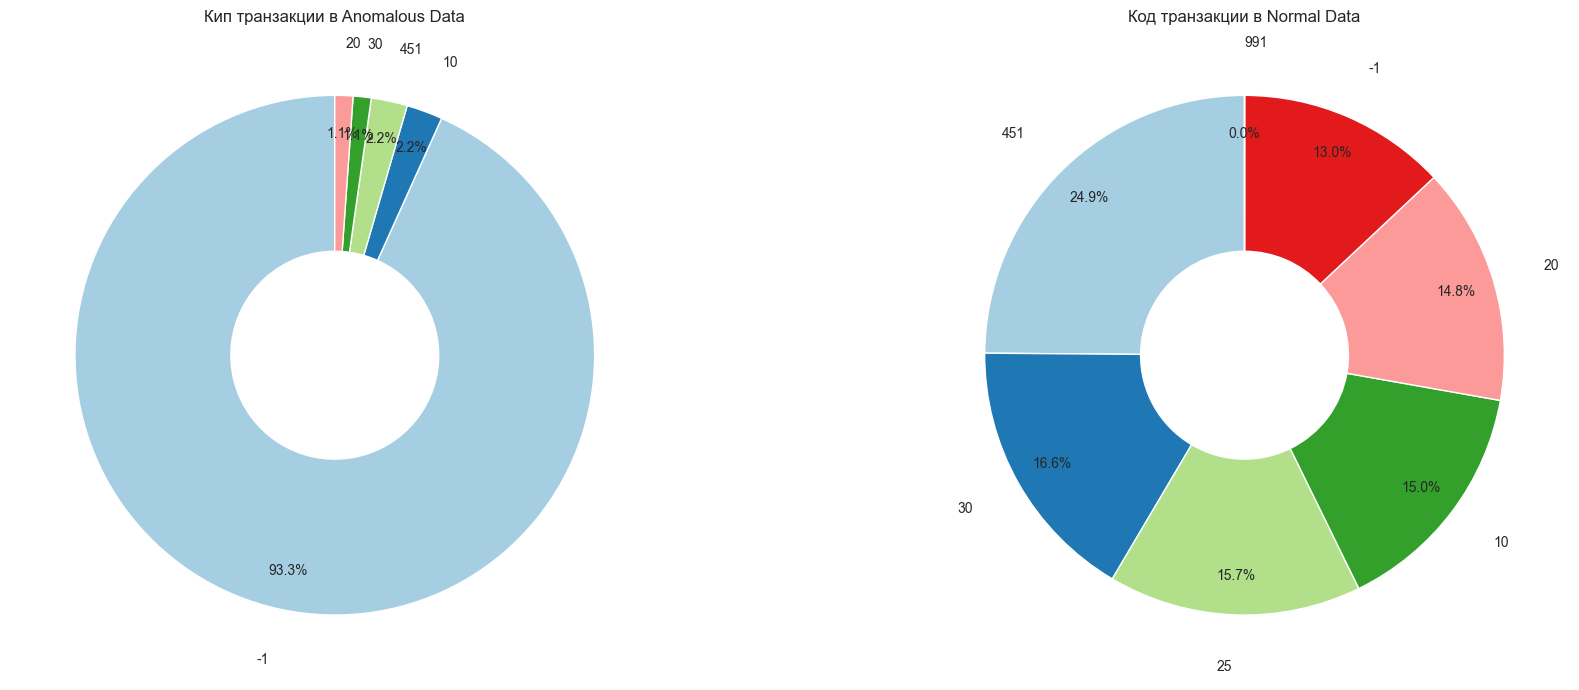

In [14]:
anomaly_counts = anomaly_df['tran_code'].value_counts()

normal_counts = normal_df['tran_code'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

axes[0].pie(anomaly_counts,
            labels=anomaly_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors,
            labeldistance=1.2,
            pctdistance=0.85,
            wedgeprops={'width': 0.6})

axes[1].pie(normal_counts,
            labels=normal_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors,
            labeldistance=1.2,
            pctdistance=0.85,
            wedgeprops={'width': 0.6})
axes[1].set_title('Код транзакции в Normal Data')
axes[0].set_title('Кип транзакции в Anomalous Data')

plt.tight_layout()
plt.show()

Аналогичная ситуация по распределеннию как и в "oper_type". В данных с аномалиями лидирует с ответом 

#### Устройства которые чаще всего использовались в аномальных транзакциях

In [21]:
device_counts = anomaly_df.groupby(['device_type', 'device_id']).size().reset_index(name='count')
filtered_device_counts = device_counts[device_counts['device_type'].isin(['atm', 'portable_term'])]
top_atm = filtered_device_counts[filtered_device_counts['device_type'] == 'atm'].nlargest(10, 'count')
top_portable_term = filtered_device_counts[filtered_device_counts['device_type'] == 'portable_term'].nlargest(10, 'count')


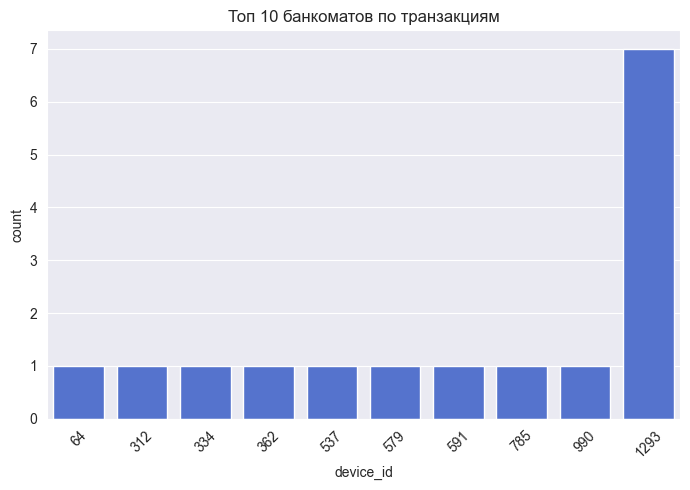

In [23]:
plt.figure(figsize=(7, 5))
sns.barplot(data=top_atm, x='device_id', y='count', color='royalblue')
plt.title('Топ 10 банкоматов по транзакциям')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


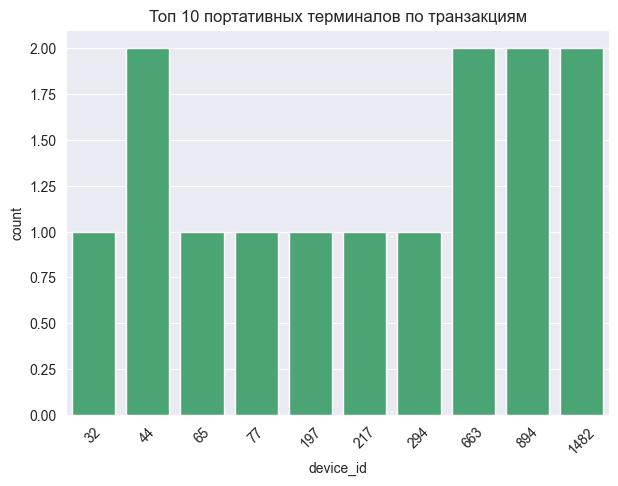

In [26]:
plt.figure(figsize=(7, 5))
sns.barplot(data=top_portable_term, x='device_id', y='count', color='mediumseagreen')
plt.title('Топ 10 портативных терминалов по транзакциям')
plt.xticks(rotation=45)
plt.show()

### Постройка карты, для установления местоположения аномальных транзакций

In [10]:
import socket
import struct
import requests


def int_to_ip(ip_int):
    return socket.inet_ntoa(struct.pack('!I', ip_int))


In [11]:
api_key = "Привет_всем_читателям_гита"

In [12]:
def get_location(ip_int):
    ip_address = int_to_ip(ip_int)
    url = f'https://api.ipgeolocation.io/ipgeo?apiKey={api_key}&ip={ip_address}'

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        latitude = data.get('latitude')
        longitude = data.get('longitude')
        city = data.get('city', 'Unknown')
        return latitude, longitude, city
    else:
        return None, None, None


In [50]:
anomaly_df[['latitude', 'longitude', 'city']] = anomaly_df['ip'].apply(lambda x: pd.Series(get_location(x)))

In [51]:
import folium

data = anomaly_df
m = folium.Map(location=[20, 0], zoom_start=2)

for lat, lon, city in zip(data['latitude'], data['longitude'], data['city']):
    folium.Marker([lat, lon], popup=city).add_to(m)
m.save('map.html')
